# S&SM
## L4. Alina Kragel, gr. 9

In [21]:
import numpy as np
import pandas as pd
import scipy.integrate as integrate
from math import exp, log, sqrt
from random import uniform
from scipy.linalg import eigvals, solve

### Вычислить приближенное значение по методу Монте-Карло интегралов ниже

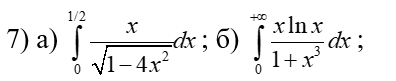

In [2]:
def function_a(x):
    return x / sqrt(1 - 4 * x**2)

In [3]:
def function_b(x):
    return (x * np.log(x)) / (1 + x ** 3)

In [4]:
def integral_a(function, a, b, n):
    return sum([function(uniform(a, b)) for _ in range(n)]) * (b - a) / n

In [9]:
def integral_b(function, n):
    result = 0
    temp = 1
    left = 0

    while abs(temp) > 10 ** (-7):
        temp = 0
        for _ in range(n):
            c_dot = uniform(left, left + 1)
            temp += function(c_dot)
        temp /= n
        result += temp
        left += 1
      
    return result

In [10]:
def get_data():
    bunch = []
    for n in range(1_000, 3_000, 100):
        mc1 = integral_a(function_a, 0, 0.5, n)
        print(mc1)
        math1 = integrate.quad(function_a, 0, 0.5)[0]
        print(math1)

        mc2 = integral_b(function_b, n)
        print(mc2)
        math2 = integrate.quad(function_b, 0, np.inf)[0]
        print(math2)

        bunch.append([n, mc1, math1, abs(mc1 - math1), n, mc2, math2, abs(mc2 - math2)])
    return bunch

In [11]:
def get_report_for_test():
    data = get_data()
    df = pd.DataFrame(data,
                      columns=pd.MultiIndex.from_product([['Integral A', 'Integral B'],
                                                          ['n', 'Monte Carlo', 'Scipy.Quad', 'Error']],
                                                         names=['Integrals:', ' ']))
    return df

In [12]:
results = get_report_for_test()
results

0.2558882577164347
0.24999999999999492
0.7298961022546477
0.7310818074880998
0.2580968122954398
0.24999999999999492
0.7290534738072696
0.7310818074880998
0.2297714590392294
0.24999999999999492
0.7277910030131918
0.7310818074880998
0.30024090380575225
0.24999999999999492
0.734857741635379
0.7310818074880998
0.2558157934673896
0.24999999999999492
0.7304039154593532
0.7310818074880998
0.22658157783033858
0.24999999999999492
0.733280158253526
0.7310818074880998
0.2407688170560817
0.24999999999999492
0.7323383347067398
0.7310818074880998
0.23672928418500505
0.24999999999999492
0.7301836332133913
0.7310818074880998
0.23787417227066204
0.24999999999999492
0.7287531355871756
0.7310818074880998
0.2497784852625648
0.24999999999999492
0.732228874242465
0.7310818074880998
0.24086647300067338
0.24999999999999492
0.7332391142362992
0.7310818074880998
0.2726312782225774
0.24999999999999492
0.7309749471817585
0.7310818074880998
0.2382030483074276
0.24999999999999492
0.7310093892846129
0.73108180748809

Integrals: Integral A                                  Integral B              \
                    n Monte Carlo Scipy.Quad     Error          n Monte Carlo   
0                1000    0.255888       0.25  0.005888       1000    0.729896   
1                1100    0.258097       0.25  0.008097       1100    0.729053   
2                1200    0.229771       0.25  0.020229       1200    0.727791   
3                1300    0.300241       0.25  0.050241       1300    0.734858   
4                1400    0.255816       0.25  0.005816       1400    0.730404   
5                1500    0.226582       0.25  0.023418       1500    0.733280   
6                1600    0.240769       0.25  0.009231       1600    0.732338   
7                1700    0.236729       0.25  0.013271       1700    0.730184   
8                1800    0.237874       0.25  0.012126       1800    0.728753   
9                1900    0.249778       0.25  0.000222       1900    0.732229   
10               2000    0.240866       0.25  0.009134       2000    0.733239   
11               2100    0.272631       0.25  0.022631       2100    0.730975   
12               2200    0.238203       0.25  0.011797       2200    0.731009   
13               2300    0.248064       0.25  0.001936       2300    0.729386   
14               2400    0.234764       0.25  0.015236       2400    0.733847   
15               2500    0.244373       0.25  0.005627       2500    0.728848   
16               2600    0.236962       0.25  0.013038       2600    0.729681   
17               2700    0.265743       0.25  0.015743       2700    0.734858   
18               2800    0.252388       0.25  0.002388       2800    0.729456   
19               2900    0.233146       0.25  0.016854       2900    0.726282   

Integrals:                       
           Scipy.Quad     Error  
0            0.731082  0.001186  
1            0.731082  0.002028  
2            0.731082  0.003291  
3            0.731082  0.003776  
4            0.731082  0.000678  
5            0.731082  0.002198  
6            0.731082  0.001257  
7            0.731082  0.000898  
8            0.731082  0.002329  
9            0.731082  0.001147  
10           0.731082  0.002157  
11           0.731082  0.000107  
12           0.731082  0.000072  
13           0.731082  0.001696  
14           0.731082  0.002766  
15           0.731082  0.002234  
16           0.731082  0.001401  
17           0.731082  0.003777  
18           0.731082  0.001626  
19           0.731082  0.004800

### Решить СЛАУ методом Монте-Карло, вариант ниже

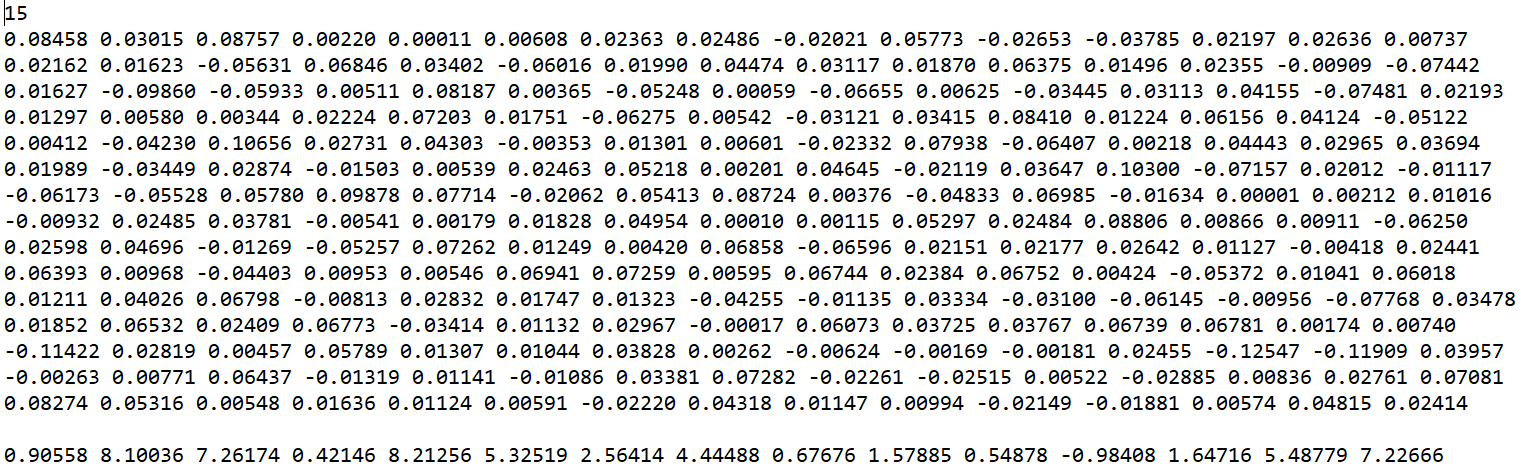

In [27]:
def check_matrix(matrix):
    data = []
    for eigval in eigvals(A):
        eigval_modulo = abs(eigval)
        assert eigval_modulo < 1, 'modulo > 1'
        data.append([np.round(eigval, 2), np.round(abs(eigval), 2)])
    return data

In [28]:
def solve(size, chain_length, matrix):
    m = size * 1000 
    
    h = np.eye(size) 
    pi = np.ones_like(f) * (1.0 / size) # Вектор вероятностей начальных состояний цепи Маркова
    P = np.array(np.ones_like(matrix)) * (1 / size) # Матрица переходов
    
    ksi = np.zeros((m, size), dtype=float)
    idxs = np.array(np.random.rand(m, chain_length) // (1 / size), dtype=int)
    Q = np.zeros((m, chain_length, size), dtype=float)

    for j in range(m):
        idx = idxs[j][0]
        Q[j][0][idx] = 0 if not pi[idx] else h[idx, idx] / pi[idx]
        for k in range(1, chain_length):
            old_state = idxs[j][k - 1]
            new_state = idxs[j][k]
            Q[j][k][idx] = (
                0 if not P[old_state][new_state]
                else Q[j][k - 1][idx] * matrix[old_state][new_state] / P[old_state][new_state]
            )

        ksi[j] = np.dot(f[idxs[j]], Q[j])

    return ksi.mean(axis=0)

In [29]:
with open("C://Users//aowl2//OneDrive//Рабочий стол//bsu/7 s//s&sm//l4//07-student.txt") as file:
    data = file.readlines()

In [30]:
matrix = data[1:-2]
A = [[float(num) for num in line.split(' ')[:-1]] for line in matrix]

In [31]:
vector = data[-1]
f = [float(num) for num in vector.split(' ')[:-1]]
f = np.array(f)

In [35]:
check_data = check_matrix(A)
print('Решение СЛАУ методуом Монте-Карло')
answer = solve(15, 100, A)
print(answer)

Решение СЛАУ методуом Монте-Карло
[2.68632255 7.95410623 5.65692027 1.33984253 9.25530265 5.86505109
 3.77975084 5.37153199 2.19190178 3.18221585 1.25139983 0.22633898
 1.22295009 6.96897353 8.59872754]
